In [197]:
from sklearn.decomposition import PCA
import pandas as pd
import scipy.cluster.hierarchy as sh
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [168]:
clean_train=pd.read_csv('clean_train.csv')
clean_test=pd.read_csv('clean_test.csv')

In [169]:
clean_train_label=clean_train['50K_label']
clean_test_label=clean_test['50K_label']
clean_train.drop(columns='50K_label',inplace=True)
clean_test.drop(columns='50K_label',inplace=True)

In [170]:
clean_train.drop(columns='Unnamed: 0',inplace=True)
clean_test.drop(columns='Unnamed: 0',inplace=True)

In [171]:
clean_test=pd.get_dummies(clean_test,drop_first=True)
clean_train=pd.get_dummies(clean_train,drop_first=True)

In [172]:
stsc=StandardScaler()
clean_train = stsc.fit_transform(clean_train)
clean_test = stsc.fit_transform(clean_test)

In [173]:
pca = PCA(n_components=2)
#pca.fit(clean_train)
clean_matrix = pca.fit_transform(clean_train)
clean_test_matrix=pca.fit_transform(clean_test)

In [174]:
clean_test_matrix.shape

(99762, 2)

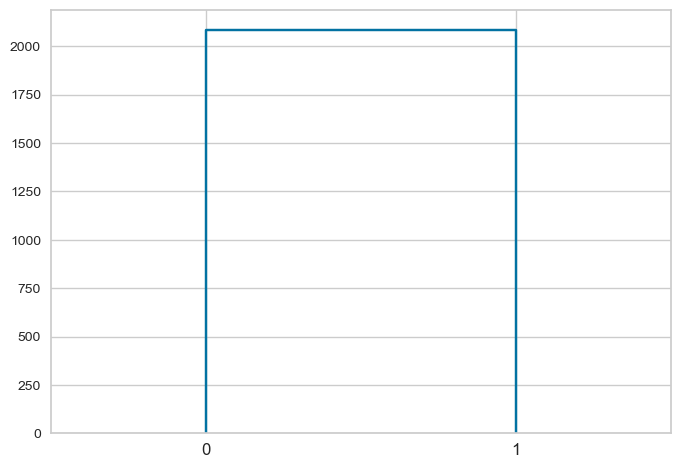

In [136]:

clean_matrix_t=clean_matrix.transpose()
dend = sh.dendrogram(sh.linkage(clean_matrix_t, method='ward',metric='euclidean'))

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=7), k=(1, 8))

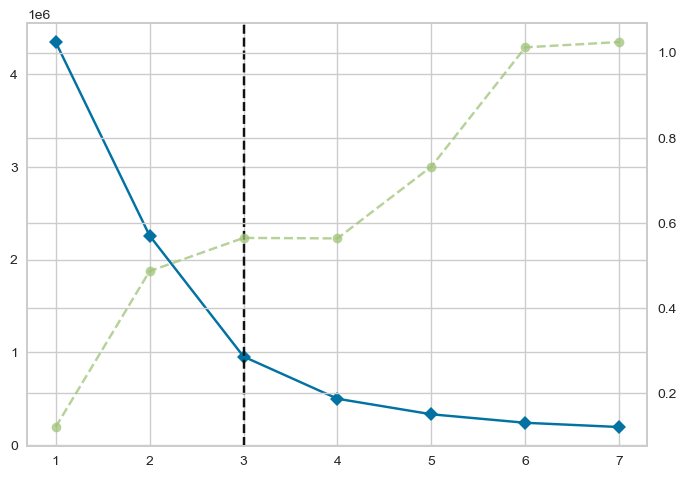

In [137]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))
visualizer.fit(clean_matrix)

The dendrogram suggests that two clusters is the optimal k value, while the Elbow Plot graph suggests three.

In [176]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(clean_matrix)
test_clusters = kmeans.fit_predict(clean_test_matrix)
clean_matrix0 = clean_matrix[clusters == 0]
clean_matrix1 = clean_matrix[clusters == 1]
clean_matrix2 = clean_matrix[clusters == 2]

clean_test0 = clean_test_matrix[test_clusters == 0]
clean_test1 = clean_test_matrix[test_clusters == 1]
clean_test2 = clean_test_matrix[test_clusters == 2]

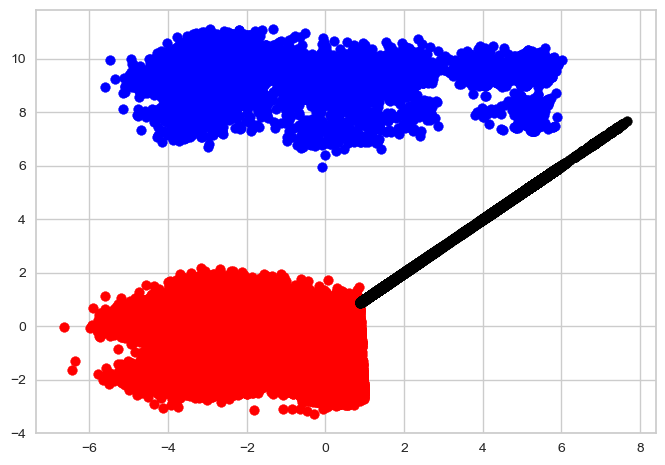

In [193]:
plt.scatter(clean_matrix1[:,0] , clean_matrix1[:,1] , color = 'red')
plt.scatter(clean_matrix0[:,0] , clean_matrix0[:,0] , color = 'black')
plt.scatter(clean_matrix2[:,0] , clean_matrix2[:,1] , color = 'blue')
plt.show()

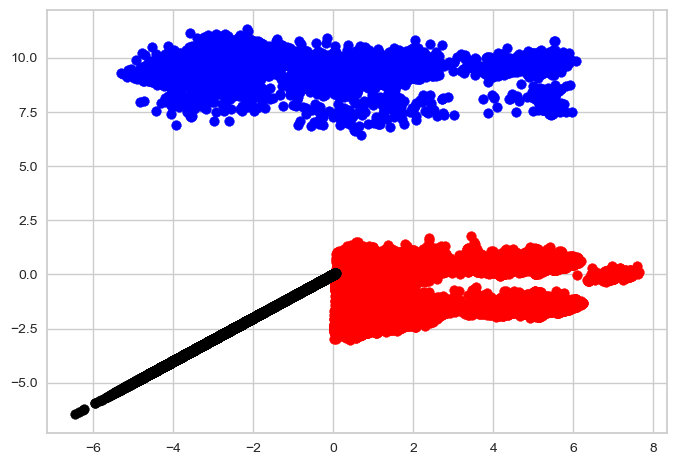

In [194]:
plt.scatter(clean_test0[:,0] , clean_test0[:,1] , color = 'red')
plt.scatter(clean_test1[:,0] , clean_test1[:,0] , color = 'black')
plt.scatter(clean_test2[:,0] , clean_test2[:,1] , color = 'blue')
plt.show()

There are two distinct clusters for both the training and test sets, while the thirdcluster has a linear appearance.

Presumably the two distinct clusters represent the two different label classes.

In [185]:
clusters_list=list(clusters)
#clean_train['clusters']=clusters_list
clean_train_list=list(clean_train)

In [187]:
clean_test2

array([[-3.50035559,  9.49351217],
       [ 5.09338566,  9.52338899],
       [ 0.24736855,  8.74908621],
       ...,
       [-3.38555463,  8.97718152],
       [-3.02984036,  8.99102574],
       [ 5.66102446,  9.74777995]])

In [199]:
kmeans2 = KMeans(n_clusters = 2)
clusters2 = kmeans2.fit_predict(clean_matrix)
test_clusters2 = kmeans2.fit_predict(clean_test_matrix)


In [200]:
print(confusion_matrix(clusters2,clean_train_label),accuracy_score(clusters2,clean_train_label),"\n\n",confusion_matrix(test_clusters2,clean_test_label),
accuracy_score(test_clusters2,clean_test_label))

[[96406   567]
 [90735 11815]] 0.5423986207103942 

 [[45387  5887]
 [48189   299]] 0.45794992081153146


The clusters are of little use for predicting label classes.  The accuracy scores are far below the threshhold of .938, which is the minimum accuracy for a classifier to have any redeemable value for this dataset.